You are to build upon the predictive analysis (classification) that you already completed in the previous mini-project, adding additional modeling from new classification algorithms as well as more explanations that are inline with the CRISP-DM framework. You should use appropriate cross validation for all of your analysis (explain your chosen method of performance validation in detail). Try to use as much testing data as possible in a realistic manner (you should define what you think is realistic and why).
This report is worth 20% of the final grade. Please upload a report (one per team) with all code used, visualizations, and text in a single document. The format of the document can be PDF, *.ipynb, or HTML. You can write the report in whatever format you like, but it is easiest to turn in the rendered iPython notebook. The results should be reproducible using your report. Please carefully describe every assumption and every step in your report.

### Dataset Selection
Select a dataset identically to the way you selected for the first project work week and mini-project. You are not required to use the same dataset that you used in the past, but you are encouraged. You must identify two tasks from the dataset to regress or classify. That is:
- two classification tasks OR
- two regression tasks OR
- one classification task and one regression task

For example, if your dataset was from the diabetes data you might try to predict two tasks: (1) classifying if a patient will be readmitted within a 30 day period or not, and (2) regressing what the total number of days a patient will spend in the hospital, given their history and specifics of the encounter like tests administered and previous admittance.

### Grading Rubric

#### Data Preparation (15 points total)
- [10 points] Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis.

**Satvik** - write detailed explanation

- [5 points] Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created).

**Satvik** - write detailed explanation


### Modeling and Evaluation (70 points total)

- [10 points] Choose and explain your evaluation metrics that you will use (i.e., accuracy, precision, recall, F-measure, or any metric we have discussed). Why are the measure(s) appropriate for analyzing the results of your modeling? Give a detailed explanation backing up any assertions.

**Satvik** - write detailed explanation

- [10 points] Choose the method you will use for dividing your data into training and testing splits (i.e., are you using Stratified 10-fold cross validation? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate.

**Satvik** - write detailed explanation

- [20 points] Create three different classification/regression models (e.g., random forest, KNN, and SVM). Two modeling techniques must be new (but the third could be SVM or logistic regression). Adjust parameters as appropriate to increase generalization performance using your chosen metric.

Logistic Regression FOR Injury and Phase - Satvik
With grid search for both Injury and Phase - Satvik

KNN FOR Injury and Phase - Nnenna
With grid search for both Injury and Phase - Nnenna
[Thursday]

Random Forest FOR Injury and Phase - Jobin
With grid search for both Injury and Phase - Jobin
[Thursday]
get feature importance - Jobin


- [10 points] Analyze the results using your chosen method of evaluation. Use visualizations of the results to bolster the analysis. Explain any visuals and analyze why they are interesting to someone that might use this model.

Dylan - Create table for 3 Injury grid search models and 3 Phase of flight grid search models 
-make more colorful confusion matrix
[Thursday]

- [10 points] Discuss the advantages of each model for each classification task, if any. If there are not advantages, explain why. Is any model better than another? Is the difference significant with 95% confidence? Use proper statistical comparison methods.

Dylan - model advantages
use package that Jake told us to use for statistical comparison -  Dylan

- [10 points] Which attributes from your analysis are most important? Use proper methods discussed in class to evaluate the importance of different attributes. Discuss the results and hypothesize about why certain attributes are more important than others for a given classification task.

Random Forest has feature importance maybe use this

### Deployment (5 points total)

- [5 points] How useful is your model for interested parties (i.e., the companies or organizations that might want to use it for prediction)? How would you measure the model's value if it was used by these parties? How would your deploy your model for interested parties? What other data should be collected? How often would the model need to be updated, etc.?

Dylan

### Exceptional Work (10 points total)

YAY done kind of...

- You have free reign to provide additional modeling.
- One idea: grid search parameters in a parallelized fashion and visualize the performances across attributes. Which parameters are most significant for making a good model for each classification algorithm?

# Lab Two: Classification

Dylan Scott, Satvik Ajmera, Nnenna Okpara, Jobin Joseph

# NTSB Aviation Accident and Incident Data (NTSB)

Source: https://data.ntsb.gov/avdata

From the source, we will be using the NTSB data which consists of various attributes related to aviation accidents and incidents. This data includes incidents and accidents that have occured till date. 

The goal for this lab is to build two classification models that predict:

1. Predicting if an incident/accident has resulted in an injury (binary classification)
2. Predicting the phase of flight for an incident that has occured (multiclass classification)

For this we will create two dataframes for these two classification problems.

In [1]:
import pandas as pd
import numpy as np

# 1. Data Preparation Part 1

[10 points] Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis.

[5 points] Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created).

In [2]:
#Read in the Aviation Data
final_data = pd.read_csv("../Data/final_data.csv",low_memory=False,dtype={'damage': str})
#Delete columns that were imported incorrectly
del final_data["Unnamed: 0"]
del final_data["dprt_state.1"]
del final_data["dprt_city"]
del final_data["index"]
del final_data["ntsb_no_x"]
del final_data['wind_vel_ind']
del final_data["ev_id"]
del final_data['ev_highest_injury']

final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115706 entries, 0 to 115705
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   acft_make          115643 non-null  object 
 1   acft_model         115630 non-null  object 
 2   cert_max_gr_wt     98673 non-null   float64
 3   acft_category      115287 non-null  object 
 4   damage             113877 non-null  object 
 5   far_part           114925 non-null  object 
 6   afm_hrs_last_insp  60298 non-null   float64
 7   type_fly           108599 non-null  object 
 8   dprt_state         108791 non-null  object 
 9   rwy_len            64222 non-null   float64
 10  rwy_width          63110 non-null   float64
 11  ev_type            115706 non-null  object 
 12  ev_city            115646 non-null  object 
 13  ev_state           109635 non-null  object 
 14  ev_country         115199 non-null  object 
 15  inj_f_grnd         51624 non-null   float64
 16  in

### 1a. Data Preparation for predicting Injury

In [3]:
#replace the all empty values to Nan
final_data= final_data.replace(r'^\s+$', np.nan, regex=True)

In [4]:
#Upper case all factor levels for each categorical variable
final_data['acft_make'] = final_data['acft_make'].str.upper()
final_data['acft_category'] = final_data['acft_category'].str.upper()
final_data['damage'] = final_data['damage'].str.upper()
final_data['type_fly'] = final_data['type_fly'].str.upper()
final_data['dprt_state'] = final_data['dprt_state'].str.upper()
final_data['ev_city'] = final_data['ev_city'].str.upper()
final_data['ev_type'] = final_data['ev_type'].str.upper()
final_data['ev_city'] = final_data['ev_city'].str.upper()
final_data['ev_country'] = final_data['ev_country'].str.upper()
final_data['sky_cond_ceil'] = final_data['sky_cond_ceil'].str.upper()
final_data['sky_cond_nonceil'] = final_data['sky_cond_nonceil'].str.upper()
final_data['wx_int_precip'] = final_data['wx_int_precip'].str.upper()
final_data['phase_flt_spec'] = final_data['phase_flt_spec'].str.upper()

In [5]:
final_data.loc[final_data['damage'].str.contains('UNK', na=False), 'damage'] = 'UNK'

#rename the injuries columns to make them easier to read
final_data = final_data.rename(columns={"inj_tot_f": "Total_Fatal_Injuries", 
                                        "inj_tot_s":"Total_Serious_Injuries",
                                        "inj_tot_m":"Total_Minor_Injuries",
                                        "inj_tot_n":'Total_Uninjured',
                                        "inj_tot_t":"Total_Injuries_Flight"})

#fill in 0s when there wasn't an injury in that category
final_data.update(final_data[['Total_Fatal_Injuries','Total_Serious_Injuries',
                              'Total_Minor_Injuries','Total_Uninjured',
                              'Total_Injuries_Flight','inj_f_grnd',
                              'inj_m_grnd','inj_s_grnd']].fillna(0))

In [6]:
final_data.dropna(subset=['cert_max_gr_wt','afm_hrs_last_insp',
                          'rwy_len','rwy_width'],inplace=True)
final_data = final_data.reset_index(drop=True)
final_data.update(final_data.fillna("UNK"))
phase_df = final_data.copy()
final_data.head(3)

,acft_make,acft_model,cert_max_gr_wt,acft_category,damage,far_part,afm_hrs_last_insp,type_fly,dprt_state,rwy_len,...,inj_s_grnd,Total_Fatal_Injuries,Total_Minor_Injuries,Total_Uninjured,Total_Serious_Injuries,Total_Injuries_Flight,sky_cond_ceil,sky_cond_nonceil,wx_int_precip,phase_flt_spec
0,BOEING,747-100,750000.0,AIR,MINR,121,113.0,UNK,JA,11800.0,...,0.0,0.0,0.0,4.0,0.0,0.0,NONE,SCAT,UNK,LANDING
1,CESSNA,172,2300.0,AIR,SUBS,091,40.0,PERS,UNK,6398.0,...,0.0,0.0,0.0,1.0,0.0,0.0,BKN,UNK,LGT,UNKNOWN
2,CESSNA,207,3800.0,AIR,SUBS,135,49.0,UNK,AK,2610.0,...,0.0,0.0,0.0,1.0,0.0,0.0,BKN,UNK,UNK,DESCENT


In [7]:
#we want to account for ALL injuries. This includes injuries on the ground as well as passangers
#Here we will make a new column that shows total injuries including ground ones
final_data['Total_Injuries_Ground'] = final_data['inj_f_grnd']+final_data['inj_m_grnd']+final_data['inj_s_grnd']
final_data['Total_Injuries'] = final_data['Total_Injuries_Ground']+final_data['Total_Injuries_Flight']
final_data['Injury'] = np.where(final_data['Total_Injuries'] >0,1,0)
injuries = final_data["Injury"].value_counts().reset_index()
injuries.head(3)

,index,Injury
0,1,18750
1,0,16677


In [8]:
final_df = final_data.copy()
#Since we added up all of our injuries we don't need the other columns that include injury count since it will be colinear to our prediction variable
final_df = final_df.drop(['Total_Fatal_Injuries','Total_Serious_Injuries','Total_Minor_Injuries',
                          'Total_Uninjured','Total_Injuries_Flight','inj_f_grnd','inj_m_grnd',
                          'inj_s_grnd','Total_Injuries_Ground',"Total_Injuries"],axis = 1)
final_df = final_df.reset_index(drop=True)

#### Preprocessing and Final Dataset description for Binary Classification: `Injury` 

We fixed the levels of columns that should have been grouped together for the `damage` predictor. We fixed the levels of the `ev_city`, by making all the city names uppercase so they would be grouped together. Then, we took the subset of the continuous predictors: `cert_max_gr_wt`,`afm_hrs_last_insp`,`rwy_len`, and `rwy_width` and removed all the NAs. We were left with approximately 35,000 rows that would be usable for prediction.

The NTSB database allowed use to include ground injuries in addition to flight injuries. So we renamed the columns, replaced the NAs in these columns with 0 and summed all them to get a total injuries column. We wanted to only include the total injuries and drop the other types of injury columns. From there, we converted the total injuries column to a binary variable for classification. If the total injuries were greater than 1, it is considered injured and less than 1 is uninjured. Our last step was to impute all the NA's for the categorical values with an unknown value called `UNK` In all, we are left with the dataframe `final_df` which consisted of 21 columns and 35,427 observations. 

Of the total 35,427 observations, 18750 observations were reported as injured and 16677 were reported as uninjured. This column called `Injury` is the response variable, we would like to predict for the classification problem.

Our final preprocess method was one-hot encoding our categorical variables. We did not standardize and scale continuous predictors. We did this, because standardizing and scaling some predictors may result in the loss of information. For example, there may be certain aircraft weights (cert_max_gr_wt) where that weight is important in classifying whether or not an incident/accident resulted in an injury.  

In [9]:
injury_df = final_df.copy()

**Our final dataframe for classifying `Injury` is called `injury_df`**

In [10]:
injury_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35427 entries, 0 to 35426
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   acft_make          35427 non-null  object 
 1   acft_model         35427 non-null  object 
 2   cert_max_gr_wt     35427 non-null  float64
 3   acft_category      35427 non-null  object 
 4   damage             35427 non-null  object 
 5   far_part           35427 non-null  object 
 6   afm_hrs_last_insp  35427 non-null  float64
 7   type_fly           35427 non-null  object 
 8   dprt_state         35427 non-null  object 
 9   rwy_len            35427 non-null  float64
 10  rwy_width          35427 non-null  float64
 11  ev_type            35427 non-null  object 
 12  ev_city            35427 non-null  object 
 13  ev_state           35427 non-null  object 
 14  ev_country         35427 non-null  object 
 15  sky_cond_ceil      35427 non-null  object 
 16  sky_cond_nonceil   354

Now we will one hot encode `injury_df` so they can be used in our models.

1. For classification of `Injury`, the our X and y are called `inj_X` and `inj_y`. 

In [11]:
inj_X = injury_df.drop("Injury", axis = 1).copy()
inj_y = injury_df["Injury"].copy()

#### One-Hot Encoding `inj_X` and `inj_y`

In [12]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
numeric_features = ['cert_max_gr_wt',"afm_hrs_last_insp","rwy_width",'rwy_len']

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler(with_mean=False))])

categorical_features = ['acft_make', 'acft_model', 'acft_category', 'damage', 'type_fly', 'dprt_state','ev_type', 'ev_state', 'sky_cond_ceil', 'sky_cond_nonceil', 'wx_int_precip', 'phase_flt_spec','ev_city','ev_country','far_part']


categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(drop="first"))])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

inj_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [13]:
inj_X = inj_pipeline.fit_transform(inj_X)

In [14]:
inj_X

<35427x18468 sparse matrix of type '<class 'numpy.float64'>'
	with 587128 stored elements in Compressed Sparse Row format>

#### Label encoding `inj_y`

In [17]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
LE.fit(inj_y)
inj_y = LE.transform(inj_y)
inj_y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

### 1b. Data Preparation for predicting the Phase of Flight

In [18]:
#Removed columns that contain UNKNOWN, UNK and OTHER factor levels
new_phase_df = phase_df[(phase_df['phase_flt_spec'] != "UNKNOWN") & (phase_df['phase_flt_spec'] != "UNK") & (phase_df['phase_flt_spec'] != "OTHER")].copy()
new_phase_df["phase_flt_spec"].value_counts()

LANDING        16743
TAKEOFF         5776
APPROACH        3300
DESCENT         2995
MANEUVERING     1569
CRUISE          1218
CLIMB            923
TAXI             741
STANDING         393
GOAROUND         301
HOVER             94
Name: phase_flt_spec, dtype: int64

In [19]:
new_phase_df.reset_index(drop=True,inplace=True)

In [20]:
new_phase_df["phase_flt_spec"] = new_phase_df["phase_flt_spec"].replace({"APPROACH":1,"CLIMB":2,
                                                                         "CRUISE":3,"DESCENT":4,
                                                                         "GOAROUND":5,"HOVER":6,
                                                                         "LANDING":7,"MANEUVERING":8,
                                                                         "STANDING":9,"TAKEOFF":10,
                                                                         "TAXI":11})

#### Preprocessing and Final Dataset description for Multiclass Classification: `phase_flt_spec` 


The response variable for the second classification problem is called `phase_flt_spec`. This variable is the broad phase of flight where an incident has occurred. So there are three factor levels that were removed called `UNKNOWN`, `UNK` and `OTHER`, because we would like to predict specific broad phases of flights where aviation accidents occured. Additionally, we wanted to include the several injury columns in this dataframe because it may be important in predicting the broad phase. inj_f_grnd, inj_m_grnd, and inj_s_grnd represent the number of minor, fatal and serious ground injuries. Total_Fatal_Injuries, Total_Minor_Injuries, Total_Serious_Injuries correspond to the number of injuries occured that were serious, minor, or fatal on the flight. The Total_Uninjured correspond to the total number of uninjured people on the flight and Total_Injuries_Flight correspond to the total number of injuries that have occured on the flight. So we are left with 26 predictors and 35,427 instances. The response variable has 11 factor levels for each broad phase of flight which have been coded to integers. Shown here:

|phase_flt_spec||Code|
|----||----|
|APPROACH||1|
|CLIMB||2|
|CRUISE||3|
|DESCENT||4|
|GOAROUND||5|
|HOVER||6|
|LANDING||7|
|MANEUVERING||8|
|STANDING||9|
|TAKEOFF||10|
|TAXI||11|

Our final preprocess method was one-hot encoding our categorical variables. We did not standardize and scale continuous predictors for the same reasons before. Certain aircraft weights (cert_max_gr_wt) and runway widths (rwy_width) may be more prone to causing an incident/accident at a specific phase of flight.

**The final dataframe for classifying `phase_flt_spec` is called `new_phase_df`**

In [21]:
new_phase_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34053 entries, 0 to 34052
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   acft_make               34053 non-null  object 
 1   acft_model              34053 non-null  object 
 2   cert_max_gr_wt          34053 non-null  float64
 3   acft_category           34053 non-null  object 
 4   damage                  34053 non-null  object 
 5   far_part                34053 non-null  object 
 6   afm_hrs_last_insp       34053 non-null  float64
 7   type_fly                34053 non-null  object 
 8   dprt_state              34053 non-null  object 
 9   rwy_len                 34053 non-null  float64
 10  rwy_width               34053 non-null  float64
 11  ev_type                 34053 non-null  object 
 12  ev_city                 34053 non-null  object 
 13  ev_state                34053 non-null  object 
 14  ev_country              34053 non-null

Now we will one hot encode `new_phase_df` so they can be used in our models.

2. For classfication of `phase_flt_spec` (Broad Phase of Flight), the X and y are called `phase_X` and `phase_y`

In [22]:
# new_phase_df = new_phase_df.drop('ev_state', axis = 1).copy()
# new_phase_df = new_phase_df.drop('dprt_state', axis = 1).copy()
new_phase_df = new_phase_df.drop('ev_city', axis = 1).copy()
phase_X = new_phase_df.drop("phase_flt_spec", axis = 1).copy()


phase_y = new_phase_df["phase_flt_spec"].copy()


In [23]:
new_phase_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34053 entries, 0 to 34052
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   acft_make               34053 non-null  object 
 1   acft_model              34053 non-null  object 
 2   cert_max_gr_wt          34053 non-null  float64
 3   acft_category           34053 non-null  object 
 4   damage                  34053 non-null  object 
 5   far_part                34053 non-null  object 
 6   afm_hrs_last_insp       34053 non-null  float64
 7   type_fly                34053 non-null  object 
 8   dprt_state              34053 non-null  object 
 9   rwy_len                 34053 non-null  float64
 10  rwy_width               34053 non-null  float64
 11  ev_type                 34053 non-null  object 
 12  ev_state                34053 non-null  object 
 13  ev_country              34053 non-null  object 
 14  inj_f_grnd              34053 non-null

In [24]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
numeric_features = ['cert_max_gr_wt',"afm_hrs_last_insp","rwy_width",'rwy_len','inj_f_grnd','inj_m_grnd',
                    'inj_s_grnd','Total_Fatal_Injuries','Total_Minor_Injuries','Total_Uninjured',
                    'Total_Serious_Injuries','Total_Injuries_Flight']

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler(with_mean=False))])

categorical_features = ['acft_make', 'acft_model', 'acft_category', 'damage', 'type_fly', 'dprt_state','ev_state', 'sky_cond_ceil', 'sky_cond_nonceil', 'wx_int_precip', 'ev_country','far_part']


categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(drop="first"))])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

phase_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [25]:
phase_X = phase_pipeline.fit_transform(phase_X)

In [26]:
phase_X

<34053x8831 sparse matrix of type '<class 'numpy.float64'>'
	with 555024 stored elements in Compressed Sparse Row format>

#### One-Hot Encoding `phase_X` and `phase_y`

In [29]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
LE.fit(phase_y)
phase_y = LE.transform(phase_y)
phase_y

array([6, 3, 0, ..., 4, 6, 9], dtype=int64)

In [30]:
phase_X

<34053x8831 sparse matrix of type '<class 'numpy.float64'>'
	with 555024 stored elements in Compressed Sparse Row format>

# Data Preparation Part 2

**Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created).**

#### Lab Two  Weights
**acft_make** - Name of the manufacturer of the involved aircraft. 
**acft_model**   - The full alphanumeric aircraft model code, including any applicable series or derivative identifiers.     
**cert_max_gr_wt** -The actual certificated max gross weight for the aircraft involved in the occurrence. This should be the same as the maximum gross weight indicated on the aircraft weight and balance. Maximum gross weight includes the weight of the aircraft, all installed equipment, fuel, passengers, cargo, and baggage.    
**acft_category**   The category of the involved aircraft. In this case, the definition of aircraft category is the same as that used with respect to the certification, ratings, privileges, and limitations of airmen. Also note that there is some overlap of category and class in the available choices.   
damage             Indicate the severity of damage to the accident aircraft. For the purposes of this variable, aircraft damage categories are defined in 49 CFR 830.2.
**far_part**           
**afm_hrs_last_insp  
type_fly           
dprt_state         
rwy_len            
rwy_width          
ev_type            
ev_city            
ev_state           
ev_country         
sky_cond_ceil      
sky_cond_nonceil   
wx_int_precip      
phase_flt_spec     
Injury**             

# Modeling and Evaluation 1

### KNN classifier
The KNN algorithm assumes that similar things exist in proximity. It can be used as a classifier to implement the k-nearest neighbors. KNN is used to make predictions. For our dataset, we will be using KNN to predict injury. Our datatest was scaled since KNN classifier requires that. We will be using stratified k-fold cross-validation because with this the mean response value is approximately equal in all the folds. Each test fold has equal class labels. For the KNN classifier, our evaluation metrics will be the accuracy, precision, AUC.

#### Accuracy
This will be used to predict which model performs better at prediction. This will be an important metric in predicting an injury. 
$Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$

#### Precision
Precision is the ratio between the True Positives and all the Positives. For our classification, it would be a measure of accidents that could lead to an injury.
$Precision = \frac{TP}{PP}$

#### Recall
Recall is the number of positive predictions divided by the number of positive class values. It is a measure of a classifier completeness. A low recall indicates many false negatives.

$Recall = \frac{TP}{P}$

### Injury Classification
Since this is a binary classification, accuracy will be an important metric in predicting injury. We will use a grid search to improve and make our models more accurate. In addition to accuracy, Precision and recall will be used to choose our final model.

### Phase of flight Classification
Since this is a multi-class classification with an imbalanced dataset, precision and recall would be important metrics in predicting the phase of flight. Accuracy alone does not illustrate the full story when working with class-imbalanced problems. Accuracy is not a strong predictor for multi-class classification. Precision will be used to measure the exactness and recall will be used to measure the completeness of our model.


# Modeling and Evaluation 2

In [31]:
from sklearn.model_selection import StratifiedShuffleSplit 
cv_log = StratifiedShuffleSplit(n_splits=5,test_size=0.10, random_state=42)

**Choose the method you will use for dividing your data into training and
testing splits (i.e., are you using Stratified 10-fold cross validation? Why?). Explain why
your chosen method is appropriate or use more than one method as appropriate. For example, if you are using time series data then you should be using continuous training and testing sets across time.**



For every model moving forward we used sklearn's StratifiedShuffleSplit. We chose 5 folds and test split percentage of 10% to improve the runtime of the models. This chosen method was especially important for multiclass classification because the folds are made by preserving the percentage of samples for each class.

# Modeling and Evaluation 3

The three models we choose are: KNN, Random Forest and Logistic Regression

#### Logistic Regression for predicting `Injury`

In [32]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
import time
lr_clf = LogisticRegression(solver='liblinear', penalty="l2",max_iter=1000,random_state=42)
iter_num=0
for train_indices, test_indices in cv_log.split(inj_X,inj_y): 
#     start = time.time()
#     elapsed_time = (time.time() - start)
    X_train = inj_X[train_indices]
    y_train = inj_y[train_indices]
    
    X_test = inj_X[test_indices]
    y_test = inj_y[test_indices]
    lr_clf.fit(X_train,y_train)  # train object

    y_hat = lr_clf.predict(X_test) # get test set predictions
    print("====Iteration",iter_num," ====")
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print('accuracy:', acc )
#     print(conf )
#     print('CV Time: ', elapsed_time)
    iter_num+=1

====Iteration 0  ====
accuracy: 0.8323454699407282
====Iteration 1  ====
accuracy: 0.820773355913068
====Iteration 2  ====
accuracy: 0.8151284222410387
====Iteration 3  ====
accuracy: 0.8185153824442563
====Iteration 4  ====
accuracy: 0.8210556025966695
Wall time: 3.37 s


Grid Search for Injury: Logistic Regression

In [33]:
%%time
from sklearn.linear_model import LogisticRegression
regEstimator = LogisticRegression()

parameters = { 'penalty':['l2']
              ,'C': [0.001, 0.01, 0.1, 1, 10, 100]
              ,'class_weight': ['balanced']
              ,'random_state': [42]
              ,'solver': ['liblinear']
              ,'max_iter':[1000]
             }

#Create a grid search object using the  
from sklearn.model_selection import GridSearchCV
inj_GridSearch = GridSearchCV(estimator=regEstimator
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv_log # KFolds = 5
                   , scoring='accuracy')

#Perform hyperparameter search to find the best combination of parameters for our data
inj_GridSearch.fit(inj_X, inj_y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Wall time: 21.1 s


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.1,
            train_size=None),
             estimator=LogisticRegression(), n_jobs=8,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced'], 'max_iter': [1000],
                         'penalty': ['l2'], 'random_state': [42],
                         'solver': ['liblinear']},
             scoring='accuracy', verbose=1)

In [34]:
inj_GridSearch.best_estimator_

LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000,
                   random_state=42, solver='liblinear')

In [94]:
print(inj_GridSearch.best_params_)

{'C': 0.1, 'class_weight': 'balanced', 'max_iter': 1000, 'penalty': 'l2', 'random_state': 42, 'solver': 'liblinear'}


In [36]:
print('Best Score - LogisticReg:', inj_GridSearch.best_score_ )

Best Score - LogisticReg: 0.827321478972622


#### Logistic Regression for predicting `phase_flt_spec`

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics as mt
import time
lr_phase = LogisticRegression(solver='liblinear', penalty="l2",max_iter=1000,random_state=42)
# scl_obj = StandardScaler()
# scl_obj.fit(X_train)
iter_num=0
for train_indices, test_indices in cv_log.split(phase_X,phase_y): 
    X_train = phase_X[train_indices]
    y_train = phase_y[train_indices]
    
    X_test = phase_X[test_indices]
    y_test = phase_y[test_indices]
#     scl_obj.fit(X_train)
#     X_train_scaled = scl_obj.transform(X_train) # apply to training
#     X_test_scaled = scl_obj.transform(X_test)
    lr_phase.fit(X_train,y_train)  # train object

    y_hat = lr_phase.predict(X_test) # get test set predictions
    print("====Iteration",iter_num," ====")
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print('accuracy:', acc )
    print(conf )
    iter_num+=1

====Iteration 0  ====
accuracy: 0.5540223135642983
[[  58    0    2   26    0    0  209    5    1   29    0]
 [   1   18    0   16    0    0   51    0    0    6    0]
 [   4    0    9   24    0    0   62    9    0   14    0]
 [  27   12    1   68    0    1  130   27    1   33    0]
 [   0    0    0    3    0    0   24    1    0    2    0]
 [   0    0    2    1    0    0    4    2    0    0    0]
 [  16    4    1   21    1    0 1532   11    1   88    0]
 [   8    0    4   27    0    0   63   34    0   21    0]
 [   2    3    1    3    0    0   20    3    1    6    0]
 [  17    6    0   19    0    0  363    5    2  166    0]
 [   2    0    1    1    0    0   63    0    0    6    1]]
====Iteration 1  ====
accuracy: 0.5375807398708162
[[  50    2    1   27    0    0  216    9    1   24    0]
 [   3   20    0   27    0    0   37    0    0    5    0]
 [   3    0   11   20    0    0   61   16    1   10    0]
 [  19   11    6   67    0    0  144   13    0   40    0]
 [   3    0    0    0    0 

In [38]:
%%time
from sklearn.linear_model import LogisticRegression
regEstimator = LogisticRegression()

parameters = { 'penalty':['l2']
              ,'C': [0.001, 0.01, 0.1, 1, 10, 100]
              ,'class_weight': ['balanced']
              ,'random_state': [42]
              ,'solver': ['liblinear']
              ,'max_iter':[1000]
             }

#Create a grid search object using the  
from sklearn.model_selection import GridSearchCV
phase_GridSearch = GridSearchCV(estimator=regEstimator
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv_log # KFolds = 5
                   , scoring='accuracy')

#Perform hyperparameter search to find the best combination of parameters for our data
phase_GridSearch.fit(phase_X, phase_y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Wall time: 12min 50s


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.1,
            train_size=None),
             estimator=LogisticRegression(), n_jobs=8,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced'], 'max_iter': [1000],
                         'penalty': ['l2'], 'random_state': [42],
                         'solver': ['liblinear']},
             scoring='accuracy', verbose=1)

In [39]:
phase_GridSearch.best_estimator_

LogisticRegression(C=0.001, class_weight='balanced', max_iter=1000,
                   random_state=42, solver='liblinear')

In [40]:
print('Best Score - LogisticReg:', phase_GridSearch.best_score_ )

Best Score - LogisticReg: 0.4471520845566648


#### KNN for Injury

In [43]:
%%time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import metrics as mt

yhat = np.zeros(inj_y.shape) # we will fill this with predictions

# create cross validation iterator
#cv = StratifiedKFold(n_splits=10)

# get a handle to the classifier object, which defines the type
clf = KNeighborsClassifier(n_neighbors=3)

# now iterate through and get predictions, saved to the correct row in yhat
# NOTE: you can parallelize this using the cross_val_predict method
for train, test in cv_log.split(inj_X,inj_y):
    clf.fit(inj_X[train],inj_y[train])
    yhat[test] = clf.predict(inj_X[test])

total_accuracy = mt.accuracy_score(inj_y, yhat)
print ('KNN accuracy', total_accuracy)
total_precision = mt.precision_score(inj_y, yhat)
print ('KNN precision', total_precision)
total_confusion_matrix = mt.confusion_matrix(inj_y, yhat)
print ('KNN confusion_matrix', total_confusion_matrix)

KNN accuracy 0.5892680723741779
KNN precision 0.8166189111747851
KNN confusion_matrix [[15461  1216]
 [13335  5415]]
Wall time: 22.9 s


In [75]:
%%time
#Create KNN Classifier
#random state is not something you can use as a parameter in KNN random state set on CV object
inj_knn_params = {
    "n_neighbors": [3,5,7,9,13],
    "weights": ["uniform", "distance"],
    'leaf_size': (20,40,1),
    'p': (1,2),
#    'metric': ('minkowski', 'chebyshev'),
    }

inj_knn_grid = GridSearchCV(estimator = KNeighborsClassifier(),
                               n_jobs = -1,
                               verbose = 1,
                               param_grid = inj_knn_params,
                               cv = cv_log,
                               scoring = 'accuracy')

inj_knn_grid.fit(inj_X,inj_y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Wall time: 19min 4s


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.1,
            train_size=None),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': (20, 40, 1),
                         'n_neighbors': [3, 5, 7, 9, 13], 'p': (1, 2),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [76]:
inj_knn_grid.best_params_

{'leaf_size': 20, 'n_neighbors': 13, 'p': 1, 'weights': 'distance'}

In [77]:
print('Best Score - KNN:', inj_knn_grid.best_score_ )

Best Score - KNN: 0.7887101326559413


#### KNN for Phase of flight

In [48]:
%%time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import numpy as np
from sklearn import metrics as mt

yhat = np.zeros(phase_y.shape) # we will fill this with predictions

# create cross validation iterator
#cv = StratifiedKFold(n_splits=10)

# get a handle to the classifier object, which defines the type
clf = KNeighborsClassifier(n_neighbors=3)

# now iterate through and get predictions, saved to the correct row in yhat
# NOTE: you can parallelize this using the cross_val_predict method
for train, test in cv_log.split(phase_X,phase_y):
    clf.fit(phase_X[train],phase_y[train])
    yhat[test] = clf.predict(phase_X[test])

total_accuracy = mt.accuracy_score(phase_y, yhat)
print ('KNN accuracy', total_accuracy)
total_precision = mt.precision_score(phase_y, yhat, average = 'micro')
print ('KNN precision', total_precision)
total_confusion_matrix = mt.confusion_matrix(phase_y, yhat)
print ('KNN confusion_matrix', total_confusion_matrix)


KNN accuracy 0.24975773059642323
KNN precision 0.24975773059642323
KNN confusion_matrix [[ 2355    23    38   121    13     1   611    21     3   111     3]
 [  562   153     2    74     3     0   102     3     3    18     3]
 [  772     7    95    73     1     1   203    16     1    48     1]
 [ 1976   104   127   232    10     2   373    55     3   111     2]
 [  193     6     4     9    11     0    64     0     0    14     0]
 [   63     1     1     7     0     7    14     0     0     1     0]
 [10474   134   180   316    51     4  4858    52     3   644    27]
 [  997    18    64   131     0     3   213    89     0    54     0]
 [  256    25     5    22     1     1    56     5     4    16     2]
 [ 3650    59    84   147    11     2  1114    19     1   682     7]
 [  463    11    13    13     1     0   185     1     1    34    19]]
Wall time: 23.5 s


In [71]:
%%time
from sklearn.neighbors import KNeighborsClassifier
#Create KNN Classifier
phase_knn_params = {
    "n_neighbors": [3,5,7,9,13],
    "weights": ["uniform", "distance"],
    'leaf_size': (20,40,1),
    'p': (1,2),
#    'metric': ('minkowski', 'chebyshev'),
    }

phase_knn_grid = GridSearchCV(estimator = KNeighborsClassifier(),
                               n_jobs = -1,
                               verbose = 1,
                               param_grid = phase_knn_params,
                               cv = cv_log,
                               scoring = 'accuracy')

phase_knn_grid.fit(phase_X,phase_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Wall time: 12min 58s


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.1,
            train_size=None),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': (20, 40, 1), 'n_neighbors': [3, 5, 7, 9],
                         'p': (1, 2), 'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [72]:
phase_knn_grid.best_params_

{'leaf_size': 20, 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}

In [73]:
phase_knn_grid.best_estimator_

KNeighborsClassifier(leaf_size=20, n_neighbors=9, p=1, weights='distance')

In [74]:
print('Best Score - KNN:', phase_knn_grid.best_score_ )

Best Score - KNN: 0.5428068115091016


#### Random Forest for Injury

In [56]:
%%time
#run random forest on cancellations with grid search

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

clf_can_rf = RandomForestClassifier(class_weight = 'balanced')

can_rf_params = {'n_estimators':[5,10,30],
                   'max_depth': [ 10,25,50, 100],
                   'criterion': ['gini', 'entropy'],
                   'min_samples_split': [50],
                   'min_samples_leaf': [50],
                   'random_state': [42]
                  }

can_rf_gridinj = GridSearchCV(estimator = clf_can_rf,
                               n_jobs = -1,
                               verbose = 1,
                               param_grid = can_rf_params,
                               cv = cv_log,
                               scoring = 'accuracy')

can_rf_gridinj.fit(inj_X,inj_y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Wall time: 14.3 s


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.1,
            train_size=None),
             estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 25, 50, 100],
                         'min_samples_leaf': [50], 'min_samples_split': [50],
                         'n_estimators': [5, 10, 30], 'random_state': [42]},
             scoring='accuracy', verbose=1)

In [57]:
#print best estimator
print(can_rf_gridinj.best_estimator_)

#with its score
print("Accuracy:",np.abs(can_rf_gridinj.best_score_))

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=50, min_samples_split=50,
                       n_estimators=30, random_state=42)
Accuracy: 0.7508890770533446


In [92]:
print(can_rf_gridinj.best_params_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 30, 'random_state': 42}


#### Random Forest for Phase of flight

In [59]:
%%time


from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

clf_can_rf = RandomForestClassifier()

can_rf_params = {'n_estimators':[30,50,80],
                   'max_depth': [75, 85, 100],
                   'criterion': ['gini', 'entropy'],
                 'class_weight':['balanced'],
                   'min_samples_split': [100,200,300],
                   'min_samples_leaf': [100,200,300],
                   'random_state': [42]
                  }

can_rf_gridphase = GridSearchCV(estimator = clf_can_rf,
                               n_jobs = -1,
                               verbose = 1,
                               param_grid = can_rf_params,
                               cv = cv_log,
                               error_score = 'raise')

can_rf_gridphase.fit(phase_X,phase_y)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Wall time: 3min 3s


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.1,
            train_size=None),
             error_score='raise', estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [75, 85, 100],
                         'min_samples_leaf': [100, 200, 300],
                         'min_samples_split': [100, 200, 300],
                         'n_estimators': [30, 50, 80], 'random_state': [42]},
             verbose=1)

In [60]:
#print best estimator
print(can_rf_gridphase.best_estimator_)

#with its score
print("Accuracy:",np.abs(can_rf_gridphase.best_score_))

RandomForestClassifier(class_weight='balanced', max_depth=75,
                       min_samples_leaf=100, min_samples_split=300,
                       n_estimators=80, random_state=42)
Accuracy: 0.2318261890780975


In [91]:
print(can_rf_gridphase.best_params_)

{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 75, 'min_samples_leaf': 100, 'min_samples_split': 300, 'n_estimators': 80, 'random_state': 42}


#### GridSearch Improved all models


# Modeling and Evaluation 4

**Analyze the results using your chosen method of evaluation. Use visualizations of the results to bolster the analysis.**

In [41]:
from sklearn.model_selection import cross_validate

def InjuryEvaluateClassifierEstimator(classifierEstimator, X, y, cv):
   
    #Perform cross validation 
    scores = cross_validate(classifierEstimator, inj_X, inj_y, scoring=['accuracy','precision','recall']
                            , cv=cv_log, return_train_score=True)

    Accavg = scores['test_accuracy'].mean()
    Preavg = scores['test_precision'].mean()
    Recavg = scores['test_recall'].mean()

    print_str = "The average accuracy for all cv folds is: \t\t\t {Accavg:.5}"
    print_str2 = "The average precision for all cv folds is: \t\t\t {Preavg:.5}"
    print_str3 = "The average recall for all cv folds is: \t\t\t {Recavg:.5}"

    print(print_str.format(Accavg=Accavg))
    print(print_str2.format(Preavg=Preavg))
    print(print_str3.format(Recavg=Recavg))
    print('*********************************************************')

    print('Cross Validation Fold Mean Error Scores')
    scoresResults = pd.DataFrame()
    scoresResults['Accuracy'] = scores['test_accuracy']
    scoresResults['Precision'] = scores['test_precision']
    scoresResults['Recall'] = scores['test_recall']

    return scoresResults

In [42]:
from sklearn.model_selection import cross_validate

def PhaseEvaluateClassifierEstimator(classifierEstimator, phase_X, phase_y, cv):
   
    #Perform cross validation 
    scores = cross_validate(classifierEstimator, phase_X, phase_y, scoring=['accuracy','precision','recall']
                            , cv=cv_log, return_train_score=True)

    Accavg = scores['test_accuracy'].mean()
    Preavg = scores['test_precision'].mean()
    Recavg = scores['test_recall'].mean()

    print_str = "The average accuracy for all cv folds is: \t\t\t {Accavg:.5}"
    print_str2 = "The average precision for all cv folds is: \t\t\t {Preavg:.5}"
    print_str3 = "The average recall for all cv folds is: \t\t\t {Recavg:.5}"

    print(print_str.format(Accavg=Accavg))
    print(print_str2.format(Preavg=Preavg))
    print(print_str3.format(Recavg=Recavg))
    print('*********************************************************')

    print('Cross Validation Fold Mean Error Scores')
    scoresResults = pd.DataFrame()
    scoresResults['Accuracy'] = scores['test_accuracy']
    scoresResults['Precision'] = scores['test_precision']
    scoresResults['Recall'] = scores['test_recall']

    return scoresResults

### Best Models - Injury

In [62]:
InjuryEvaluateClassifierEstimator(inj_GridSearch, inj_X, inj_y, cv_log)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
The average accuracy for all cv folds is: 			 0.82732
The average precision for all cv folds is: 			 0.90855
The average recall for all cv folds is: 			 0.74912
*********************************************************
Cross Validation Fold Mean Error Scores


,Accuracy,Precision,Recall
0,0.836579,0.915918,0.761067
1,0.820209,0.900907,0.741867
2,0.824443,0.902894,0.748800
3,0.825572,0.913215,0.740800
4,0.829805,0.909794,0.753067


In [78]:
InjuryEvaluateClassifierEstimator(inj_knn_grid, inj_X, inj_y, cv_log)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Fitting 5 folds for each of 60 candidates, totalling 300 fits
The average accuracy for all cv folds is: 			 0.78837
The average precision for all cv folds is: 			 0.89137
The average recall for all cv folds is: 			 0.68341
*********************************************************
Cross Validation Fold Mean Error Scores


,Accuracy,Precision,Recall
0,0.794242,0.899582,0.688000
1,0.791420,0.894993,0.686400
2,0.783517,0.883657,0.680533
3,0.784928,0.892731,0.674667
4,0.787750,0.885911,0.687467


In [64]:
InjuryEvaluateClassifierEstimator(can_rf_gridinj, inj_X, inj_y, cv_log)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
The average accuracy for all cv folds is: 			 0.74406
The average precision for all cv folds is: 			 0.85857
The average recall for all cv folds is: 			 0.61835
*********************************************************
Cross Validation Fold Mean Error Scores


,Accuracy,Precision,Recall
0,0.702230,0.851027,0.530133
1,0.741744,0.869231,0.602667
2,0.742027,0.847433,0.625067
3,0.736099,0.868917,0.590400
4,0.798194,0.856265,0.743467


### Best Models - Phase

In [66]:
PhaseEvaluateClassifierEstimator(phase_GridSearch, phase_X, phase_y, cv_log)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\metrics\_classification.py", line 1653, in precision_score
    p, _, _, _ = pr

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\metrics\_classification.py", line 1653, in precision_score
    p, _, _, _ = pr

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\metrics\_classification.py", line 1653, in precision_score
    p, _, _, _ = pr

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\metrics\_classification.py", line 1653, in precision_score
    p, _, _, _ = pr

Fitting 5 folds for each of 6 candidates, totalling 30 fits
The average accuracy for all cv folds is: 			 nan
The average precision for all cv folds is: 			 nan
The average recall for all cv folds is: 			 nan
*********************************************************
Cross Validation Fold Mean Error Scores


C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\metrics\_classification.py", line 1653, in precision_score
    p, _, _, _ = pr

,Accuracy,Precision,Recall
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [67]:
PhaseEvaluateClassifierEstimator(phase_knn_grid, phase_X, phase_y, cv_log)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.51438825 0.54270799 0.51014682 0.53846656 0.5165416  0.54557912
 0.51556281 0.5428385  0.52084829 0.54675367 0.51680261 0.54473083
 0.52247961 0.54884176 0.51745514 0.54623165 0.52306688 0.54858075
 0.52045677 0.54642741        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.51438825 0.54270799
 0.51014682 0.53846656 0.5165416  0.54557912 0.51556281 0.5428385
 0.52084829 0.54675367 0.51680261 0.54473083 0.52247961 0.54884176
 0.51745514 0.54623165 0.52306688 0.54858075 0.52045677 0.54642741
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan      

Fitting 5 folds for each of 120 candidates, totalling 600 fits


C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.51601958 0.54303426 0.51216966 0.53846656 0.51771615 0.54773246
 0.51327896 0.53911909 0.52130506 0.54942904 0.51686786 0.54401305
 0.52306688 0.55079935 0.51836868 0.54597064 0.52371941 0.55327896
 0.52032626 0.5475367         nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.51601958 0.54303426
 0.51216966 0.53846656 0.51771615 0.54773246 0.51327896 0.53911909
 0.52130506 0.54942904 0.51686786 0.54401305 0.52306688 0.55079935
 0.51836868 0.54597064 0.52371941 0.55327896 0.52032626 0.5475367
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan      

Fitting 5 folds for each of 120 candidates, totalling 600 fits


C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.51771615 0.54290375 0.51262643 0.53781403 0.51915171 0.54512235
 0.51367047 0.54088091 0.52078303 0.54805873 0.51856444 0.54420881
 0.5222186  0.54890701 0.52084829 0.54701468 0.52267537 0.55008157
 0.52078303 0.54805873        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.51771615 0.54290375
 0.51262643 0.53781403 0.51915171 0.54512235 0.51367047 0.54088091
 0.52078303 0.54805873 0.51856444 0.54420881 0.5222186  0.54890701
 0.52084829 0.54701468 0.52267537 0.55008157 0.52078303 0.54805873
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan     

Fitting 5 folds for each of 120 candidates, totalling 600 fits


C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.51849918 0.54440457 0.51530179 0.54323002 0.51986949 0.54649266
 0.51915171 0.5451876  0.52378467 0.54988581 0.51947798 0.54812398
 0.52508972 0.55249592 0.52156607 0.55027732 0.52508972 0.55373573
 0.5212398  0.55014682        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.51849918 0.54440457
 0.51530179 0.54323002 0.51986949 0.54649266 0.51915171 0.5451876
 0.52378467 0.54988581 0.51947798 0.54812398 0.52508972 0.55249592
 0.52156607 0.55027732 0.52508972 0.55373573 0.5212398  0.55014682
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan      

Fitting 5 folds for each of 120 candidates, totalling 600 fits


C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.51732463 0.53944535 0.51151713 0.5359217  0.52013051 0.54336052
 0.51367047 0.53794454 0.51921697 0.54309951 0.51425775 0.53996737
 0.52287113 0.54597064 0.51628059 0.54094617 0.52195759 0.54747145
 0.51745514 0.54342577        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.51732463 0.53944535
 0.51151713 0.5359217  0.52013051 0.54336052 0.51367047 0.53794454
 0.51921697 0.54309951 0.51425775 0.53996737 0.52287113 0.54597064
 0.51628059 0.54094617 0.52195759 0.54747145 0.51745514 0.54342577
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan     

The average accuracy for all cv folds is: 			 nan
The average precision for all cv folds is: 			 nan
The average recall for all cv folds is: 			 nan
*********************************************************
Cross Validation Fold Mean Error Scores


C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\metrics\_classification.py", line 1653, in precision_score
    p, _, _, _ = pr

,Accuracy,Precision,Recall
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [68]:
PhaseEvaluateClassifierEstimator(can_rf_gridphase, phase_X, phase_y, cv_log)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\metrics\_classification.py", line 1653, in precision_score
    p, _, _, _ = pr

Fitting 5 folds for each of 162 candidates, totalling 810 fits


C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\metrics\_classification.py", line 1653, in precision_score
    p, _, _, _ = pr

Fitting 5 folds for each of 162 candidates, totalling 810 fits


C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\metrics\_classification.py", line 1653, in precision_score
    p, _, _, _ = pr

Fitting 5 folds for each of 162 candidates, totalling 810 fits


C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\metrics\_classification.py", line 1653, in precision_score
    p, _, _, _ = pr

Fitting 5 folds for each of 162 candidates, totalling 810 fits
The average accuracy for all cv folds is: 			 nan
The average precision for all cv folds is: 			 nan
The average recall for all cv folds is: 			 nan
*********************************************************
Cross Validation Fold Mean Error Scores


C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\drsco\anaconda3_new\lib\site-packages\sklearn\metrics\_classification.py", line 1653, in precision_score
    p, _, _, _ = pr

,Accuracy,Precision,Recall
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


Waiting on the above values to run		
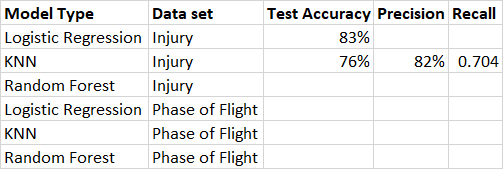

**Explain any visuals and analyze why they are interesting to someone that might use this model.**

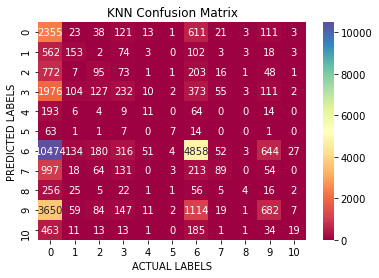

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
ax= plt.subplot()
sns.heatmap(total_confusion_matrix, annot=True, fmt = "d", cmap="Spectral"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('ACTUAL LABELS');ax.set_ylabel('PREDICTED LABELS'); 
ax.set_title('KNN Confusion Matrix'); 
#ax.xaxis.set_ticklabels(['11', '12','13','21','22','23','31','32','33']); ax.yaxis.set_ticklabels(['Soft', 'Tough']);

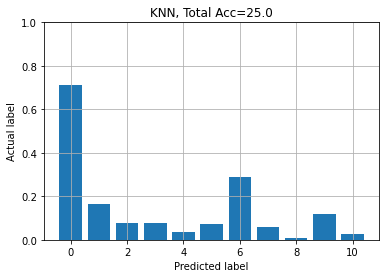

In [54]:
def per_class_accuracy(ytrue,yhat):
    conf = mt.confusion_matrix(ytrue,yhat)
    norm_conf = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]
    return np.diag(norm_conf)

def plot_class_acc(ytrue,yhat, title=''):
    acc_list = per_class_accuracy(ytrue,yhat)
    plt.bar(range(len(acc_list)), acc_list)
    plt.xlabel('Predicted label')
    plt.ylabel('Actual label')
    plt.title(title+", Total Acc=%.1f"%(100*mt.accuracy_score(ytrue,yhat)))
    plt.grid()
    plt.ylim([0,1])
    plt.show()
    
plot_class_acc(phase_y,yhat,title="KNN")

# Modeling and Evaluation 5

Code from: http://rasbt.github.io/mlxtend/user_guide/evaluate/paired_ttest_5x2cv/

In [83]:
# Test Train split for Injury
for train_indices, test_indices in cv_log.split(inj_X,inj_y): 
    X_train_inj = inj_X[train_indices]
    y_train_inj = inj_y[train_indices]
    
    X_test_inj = inj_X[test_indices]
    y_test_inj = inj_y[test_indices]

In [84]:
for train_indices, test_indices in cv_log.split(phase_X,phase_y): 
    X_train_phase = phase_X[train_indices]
    y_train_phase = phase_y[train_indices]
    
    X_test_phase = phase_X[test_indices]
    y_test_phase = phase_y[test_indices]

#### Injury Model Comparison Test

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


#Logistic vs Decision Tree
clf1 = LogisticRegression(random_state=42,max_iter = 1000)
clf2 = DecisionTreeClassifier(random_state=42)



score1 = clf1.fit(X_train_inj, y_train_inj).score(X_test_inj, y_test_inj)
score2 = clf2.fit(X_train_inj, y_train_inj).score(X_test_inj, y_test_inj)

print('Logistic regression for injury accuracy: %.2f%%' % (score1*100))
print('Decision tree for injury accuracy: %.2f%%' % (score2*100))

Logistic regression for injury accuracy: 82.08%
Decision tree for injury accuracy: 79.03%


In [105]:
import mlxtend
from mlxtend.evaluate import paired_ttest_5x2cv


t, p = paired_ttest_5x2cv(estimator1=clf1,
                          estimator2=clf2,
                          X=X, y=y,
                          random_seed=1)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

NameError: name 'paired_ttest_5x2cv' is not defined

In [ ]:
#logistic vs KNN
clf2 = DecisionTreeClassifier(random_state=42)
clf2 = KNeighborsClassifier(random_state=42)



score1 = clf1.fit(X_train_inj, y_train_inj).score(X_test_inj, y_test_inj)
score2 = clf2.fit(X_train_inj, y_train_inj).score(X_test_inj, y_test_inj)

print('Logistic regression for injury accuracy: %.2f%%' % (score1*100))
print('Decision tree for injury accuracy: %.2f%%' % (score2*100))

In [ ]:
from mlxtend.evaluate import paired_ttest_5x2cv


t, p = paired_ttest_5x2cv(estimator1=clf1,
                          estimator2=clf2,
                          X=X, y=y,
                          random_seed=1)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

In [ ]:
#Decision Tree vs KNN
clf1 = LogisticRegression(random_state=42,max_iter = 1000)
clf2 = KNeighborsClassifier(random_state=42)



score1 = clf1.fit(X_train_inj, y_train_inj).score(X_test_inj, y_test_inj)
score2 = clf2.fit(X_train_inj, y_train_inj).score(X_test_inj, y_test_inj)

In [ ]:
from mlxtend.evaluate import paired_ttest_5x2cv


t, p = paired_ttest_5x2cv(estimator1=clf1,
                          estimator2=clf2,
                          X=X, y=y,
                          random_seed=1)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

#### Phase Model Comparison T test

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split



clf1 = LogisticRegression(random_state=42,max_iter = 1000)
clf2 = DecisionTreeClassifier(random_state=42)



score1 = clf1.fit(X_train_phase, y_train_phase).score(X_test_phase, y_test_phase)
score2 = clf2.fit(X_train_phase, y_train_phase).score(X_test_phase, y_test_phase)

print('Logistic regression for injury accuracy: %.2f%%' % (score1*100))
print('Decision tree for injury accuracy: %.2f%%' % (score2*100))

Logistic regression for injury accuracy: 55.05%
Decision tree for injury accuracy: 49.56%


# Modeling and Evaluation 6

what variables are most important to each model

# Deployment

**How useful is your model for interested parties (i.e., the companies or organizations that might want to use it for prediction)? How would you measure the model's value if it was used by these parties? How would your deploy your model for interested parties? What other data should be collected? How often would the model need to be updated, etc.?**



Our model could be extremely useful to the parties such as the NTSB. The NTSB has publicly available data on
incidents. Creating a model that can classify injury and the phase of flight can improve safety regulations for aircrafts, educate investigators who are tasked with aircraft inspection after an incident has occured, and provide meaningful insights on what features are most important to classification.



For example, safety regulations can improved, because the model could be used to understand the underlying factors that result in incidents that cause injuries. Predicting the broad phase of flight allows the NTSB and FAA to implement more safety measures at these stages of flight. Aircraft inspectors could use the phase of flight model to better predict the aircrafts that are more likely to have an incident at a specific broad phase of flight. Finally, the models provide insight about feature importance for all the interested parties. The model would be deployed so it can be tested on new incidents that have occured. There is more data we can collect that we had not added which include more information about the crew such as crew size, and experience. Certain attributes could be better predictors for both our classification problems. The model would need to be update every couple of months because new data is usually added at the beginning of each month.

# Exceptional Work

GridSearch

### ROC Curve

We will plot the ROC curve which is a plot of True Positive Rate vs False Positive Rate. The AUC-ROC will help us visualize how well our KNN classifier is performing. For our dataset, We save the outputs into a dictionary of fpr and tpr (false positive and true positive rates). The keys to the dictionary are the class value

In [69]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(inj_X,inj_y)

y_scores = knn.predict_proba(inj_y)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=[0 0 0 ... 1 1 1].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
print(roc_auc)

In [ ]:
#Perform hyperparameter search to find the best k value
param_grid = {'n_neighbors':np.arange(1,21)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=10)
knn_cv.fit(inj_X,inj_y)

In [ ]:
knn_cv.best_score_

In [ ]:
knn_cv.best_params_

In [ ]:
knn_cv.best_estimator_

In [ ]:
#We will try the roc curve with new k value
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(X_train,y_train)

y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

We had a better AUC score of 86% with k=20